In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path="/content/drive/My Drive/Computer self studies/DL4CV/Breaking-Captchas/"
os.chdir(path)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
import matplotlib.pyplot as plt
from utilities.nn.cnn import LeNet
from imutils import paths
import imutils
import numpy as np
import cv2

path="/content/drive/My Drive/Computer self studies/DL4CV/SmileDetection/"
os.chdir(path)

Using TensorFlow backend.


In [0]:
data0=[]
labels0=[]

for imgPath in sorted(list(paths.list_images(path+"dataset"))):
  print("Current length "+str(len(labels0))+" "+imgPath)
  img=cv2.cvtColor(cv2.imread(imgPath),cv2.COLOR_BGR2GRAY)
  img=imutils.resize(img,width=28)
  img=img_to_array(img)
  data0.append(img)
  label=imgPath.split(os.path.sep)[-3]
  label="smiling" if label=="positives" else "niet_smiling"
  labels0.append(label)

In [0]:
data = np.array(data0, dtype="float") / 255.0
labels = np.array(labels0)
# convert the labels from integers to vectors
le = LabelEncoder().fit(labels)
labels = np_utils.to_categorical(le.transform(labels), 2)

In [0]:
#Finding the wights of labels
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [0]:
# partition the data into training and testing splits using 80% of the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.20, stratify=labels, random_state=42)

In [8]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=1, classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

[INFO] compiling model...






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),class_weight=classWeight, batch_size=64, epochs=15, verbose=1)

[INFO] training network...



Train on 10546 samples, validate on 2637 samples
Epoch 1/15





10546/10546 [==============================] - 16s 2ms/step - loss: 0.4392 - acc: 0.8013 - val_loss: 0.2834 - val_acc: 0.8840
Epoch 2/15
10546/10546 [==============================] - 1s 96us/step - loss: 0.2763 - acc: 0.8882 - val_loss: 0.3179 - val_acc: 0.8692
Epoch 3/15
10546/10546 [==============================] - 1s 95us/step - loss: 0.2463 - acc: 0.9045 - val_loss: 0.2415 - val_acc: 0.9067
Epoch 4/15
10546/10546 [==============================] - 1s 95us/step - loss: 0.2344 - acc: 0.9079 - val_loss: 0.2502 - val_acc: 0.9014
Epoch 5/15
10546/10546 [==============================] - 1s 95us/step - loss: 0.2194 - acc: 0.9152 - val_loss: 0.2456 - val_acc: 0.9029
Epoch 6/15
10546/10546 [==============================] - 1s 95us/step - loss: 0.2085 - acc: 0.9214 - val_loss: 0.2318 - val_acc: 0.9067
Epoch 7/15
10546/10546 [==============================] - 1s 96us/step - loss: 0.1979 - acc: 0

In [10]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=le.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

niet_smiling       0.92      0.96      0.94      1899
     smiling       0.88      0.78      0.83       738

    accuracy                           0.91      2637
   macro avg       0.90      0.87      0.88      2637
weighted avg       0.91      0.91      0.91      2637



In [11]:
# save the model to disk
print("[INFO] serializing network...")
model.save(path+"output/lenet.h5")

[INFO] serializing network...


In [0]:
model.save(path+"output/lenet.hdf5")

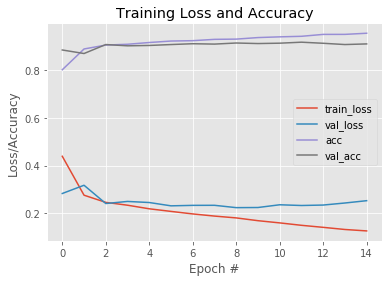

In [13]:
# plot the training + testing loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), H.history["acc"], label="acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()